Будем работать с датасетом физической активности, которую собирает приложение о туристических маршрутах.

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (tAcc-XYZ) и "3-осевая угловая скорость" (tGyro-XYZ).

Все сигналы отсортированы по времени, пропущены через фильтр шума.
Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
К получившимся окнам применяли различные функции для получения следующих показателей:
max
min
mad (median)
mean
std
skewness (коэффициент асимметричности распределения признака в окне)
etc. (подробнее, на сколько это возможно, указано на страничке датасета)
Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
bandsEnergy (энергия частотного интервала)
Были посчитаны углы между векторами соответствующих окон.
Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.
Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:

tBodyAccMag-mean() - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
fBodyAcc-bandsEnergy()-1,8.2 - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
angle(X,gravityMean) - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна
Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

Задание №1. Проведите  предобработку (удаление дубликатов, удаление/замена пропущенных данных, удаление выбросов, замена типа) и анализ данных (визуализация, определение корреляций, построение корреляционной матрицы, группирование и агрегирование, оценка существования зависимостей между переменными).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


Т.к в датасете 563 признака, а нам столько для демонтрации знаний основ машинного обучения не нужно, я выбрал наиболее интересные руками.

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

В задаче кластеризации (обучение без учителя) мы будем разбивать на кластеры по Activity, а в задаче регрессии я постараюсь предсказать максимальную величину ускорения тела по оси X, возможно мы будем использовать эту модель для заполнения пропусков в случае какой либо ошибки в дальнейшем в нашем проекте по туристическим маршрутам, думаю это будет хоть сколько то полезно.

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

### Проведем предобработку и анализ и визуализацию данных для выполнения пунка номер 1.

In [ ]:
# Посмотрим на пропуски
train.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tBodyAccMag-mean()            7352 non-null   float64
 1   tBodyGyroJerk-mad()-X         7352 non-null   float64
 2   tGravityAcc-min()-X           7352 non-null   float64
 3   tBodyAcc-max()-X              7352 non-null   float64
 4   fBodyAcc-bandsEnergy()-1,8.2  7352 non-null   float64
 5   angle(X,gravityMean)          7352 non-null   float64
 6   angle(Y,gravityMean)          7352 non-null   float64
 7   angle(Z,gravityMean)          7352 non-null   float64
 8   fBodyAcc-skewness()-X         7352 non-null   float64
 9   subject                       7352 non-null   int64  
 10  Activity                      7352 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 631.9+ KB


их нету

In [ ]:
train[train.duplicated()].sum().sum() # посмотрим количество дублей

0.0

их нету

In [ ]:
# проведем те же процедуры для датасета test и train
test.isnull().sum().sum()
test[test.duplicated()].sum().sum()

0.0

посмотрим основные характеристики датасета

In [ ]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

In [ ]:
train.median()

<ipython-input-16-4f4a9c1154f5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.median()


tBodyAccMag-mean()              -0.883371
tBodyGyroJerk-mad()-X           -0.950268
tGravityAcc-min()-X              0.926693
tBodyAcc-max()-X                -0.881637
fBodyAcc-bandsEnergy()-1,8.2    -0.986582
angle(X,gravityMean)            -0.709417
angle(Y,gravityMean)             0.182071
angle(Z,gravityMean)             0.003181
fBodyAcc-skewness()-X           -0.163271
subject                         19.000000
dtype: float64

In [ ]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

In [ ]:
test.median()

<ipython-input-18-b51c85c92acd>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.median()


tBodyAccMag-mean()              -0.861830
tBodyGyroJerk-mad()-X           -0.914698
tGravityAcc-min()-X              0.934930
tBodyAcc-max()-X                -0.852659
fBodyAcc-bandsEnergy()-1,8.2    -0.979336
angle(X,gravityMean)            -0.729648
angle(Y,gravityMean)             0.181563
angle(Z,gravityMean)            -0.010671
fBodyAcc-skewness()-X           -0.202050
subject                         12.000000
dtype: float64

из интересного - есть отрицательные числа.

Проверим данные на сбалансированность

In [ ]:
train["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [ ]:
maxx = train["Activity"].value_counts().max()
minn = train["Activity"].value_counts().min()
100 - (minn*100)/maxx

29.92181947405828

т к < чем 30% -> данные в train сбалансированы

In [ ]:
test["Activity"].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [ ]:

maxx = test["Activity"].value_counts().max()
minn = test["Activity"].value_counts().min()
100 - (minn*100)/maxx

21.787709497206706

Посчитаем корреляцию всех признаков:

In [ ]:
cors_train = train
dat = ["STANDING", "LAYING", "WALKING", "SITTING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
for t in dat:
  cors_train[str(t)] = 0
  cors_train.loc[cors_train["Activity"] == str(t), str(t)] = 1

cors_train.corr()

<ipython-input-24-88042b5051bb>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cors_train.corr()


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
STANDING                               -0.414460              -0.370699   
LAYING                                 -0.396643              -0.386730   
WALKING                                 0.358825               0.531695   
SITTING                                -0.396389              -0.379403   
WALKING_DOWNSTAIRS                      0.561344               0.445048   
WALKING_UPSTAIRS                        0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
STANDING                                 0.262354         -0.399861   
LAYING                                  -0.973167         -0.394745   
WALKING                                  0.234820          0.298526   
SITTING                                  0.187055         -0.387297   
WALKING_DOWNSTAIRS                       0.192409          0.658369   
WALKING_UPSTAIRS                         0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
STANDING                                         -0.296141   
LAYING                                           -0.287395   
WALKING                                           0.189834   
SITTING                                          -0.276766   
WALKING_DOWNSTAIRS                                0.217399   
WALKING_UPSTAIRS                                  0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

In [ ]:
train.corr()


<ipython-input-25-f4d37163d5c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
STANDING                               -0.414460              -0.370699   
LAYING                                 -0.396643              -0.386730   
WALKING                                 0.358825               0.531695   
SITTING                                -0.396389              -0.379403   
WALKING_DOWNSTAIRS                      0.561344               0.445048   
WALKING_UPSTAIRS                        0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
STANDING                                 0.262354         -0.399861   
LAYING                                  -0.973167         -0.394745   
WALKING                                  0.234820          0.298526   
SITTING                                  0.187055         -0.387297   
WALKING_DOWNSTAIRS                       0.192409          0.658369   
WALKING_UPSTAIRS                         0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
STANDING                                         -0.296141   
LAYING                                           -0.287395   
WALKING                                           0.189834   
SITTING                                          -0.276766   
WALKING_DOWNSTAIRS                                0.217399   
WALKING_UPSTAIRS                                  0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

In [ ]:
test.corr()

<ipython-input-26-c06d3b70ad5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.corr()


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)                      1.000000             -0.668108   
angle(Y,gravityMean)                     -0.668108              1.000000   
angle(Z,gravityMean)                     -0.615114              0.425454   
fBodyAcc-skewness()-X                     0.235208             -0.087006   
subject                                   0.003138             -0.047553   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.425011               0.365670   
tBodyGyroJerk-mad()-X                     0.368411               0.278765   
tGravityAcc-min()-X                       0.633881              -0.237864   
tBodyAcc-max()-X                          0.398008               0.338543   
fBodyAcc-bandsEnergy()-1,8.2              0.446245               0.293881   
angle(X,gravityMean)                     -0.615114               0.235208   
angle(Y,gravityMean)                      0.425454              -0.087006   
angle(Z,gravityMean)                      1.000000              -0.208121   
fBodyAcc-skewness()-X                    -0.208121               1.000000   
subject                                   0.055885               0.015103   

                               subject  
tBodyAccMag-m

Коэффициенты корреляции говорят о том, что зависимость между признаками есть, или она отрицательная или положительная. Однако, есть и коэффициенты, которые стремятся к 0, значит есть признаки, зависимости между которыми зависимости никакой нет

Теперь перейдем к визуализации данных и построении графиков.

Начнем с наглядного графика, показывающего , что наши данные сбалансированы

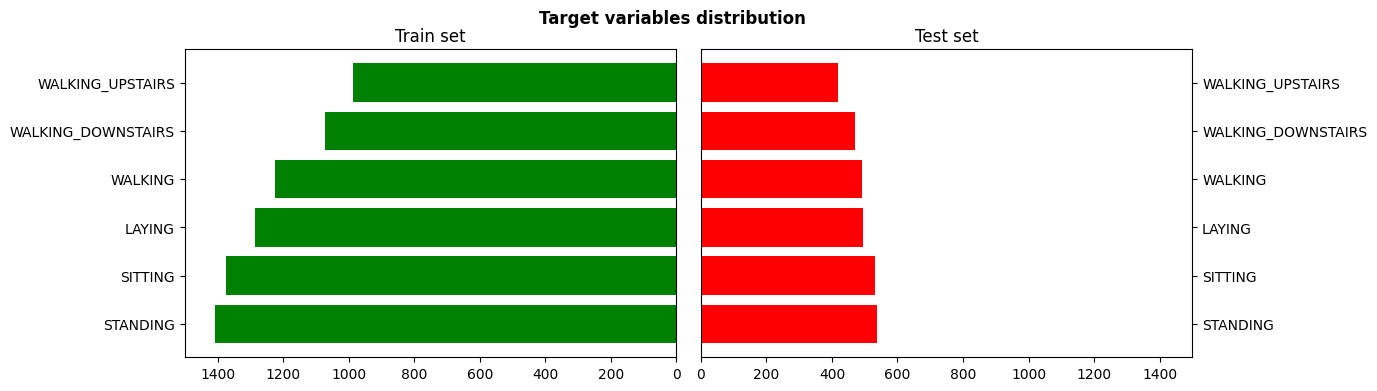

In [ ]:
# для test
ind_test = test["Activity"].unique()
ind2_test = np.array(test["Activity"].value_counts())
#ind_test = np.delete(ind_test, 6)

#Для train
ind_train = train["Activity"].unique()
ind2_train = np.array(train["Activity"].value_counts())
#ind_train = np.delete(ind_train, 6)

# Построение графиков
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 4))

# Строим гистограммы для train и set
axs[0].barh(ind_train, ind2_train, label = "Train set", color = "green")
axs[1].barh(ind_test, ind2_test, label = "Test set", color = "red")

# Устанавливаем лимиты на оси X, чтобы цена деления графиков была одинаковая
axs[1].set_xlim(0, 1500)
axs[0].set_xlim(0, 1500)

# Отзеркаливает первый график, чтобы оси y у обоих графиков стояли рядом
axs[0].invert_xaxis()

axs[0].set_title('Train set')
axs[1].set_title('Test set')

ax = plt.gca() # Получаем текущие оси
#axs[1].yaxis.set_label_position("right")

axs[1].yaxis.tick_right() # Перемещает метки оси второго графика вправо
#plt.xlim(0, 1400)
#ax.spines['left'].set_position('center')
fig.suptitle('Target variables distribution', fontweight='bold')

plt.subplots_adjust(wspace=0.05) # Меняем расстояние между графиками

plt.show()


Визуализируем матрицу корреляций для наглядности и чтобы показать, что мы умеем это делать.

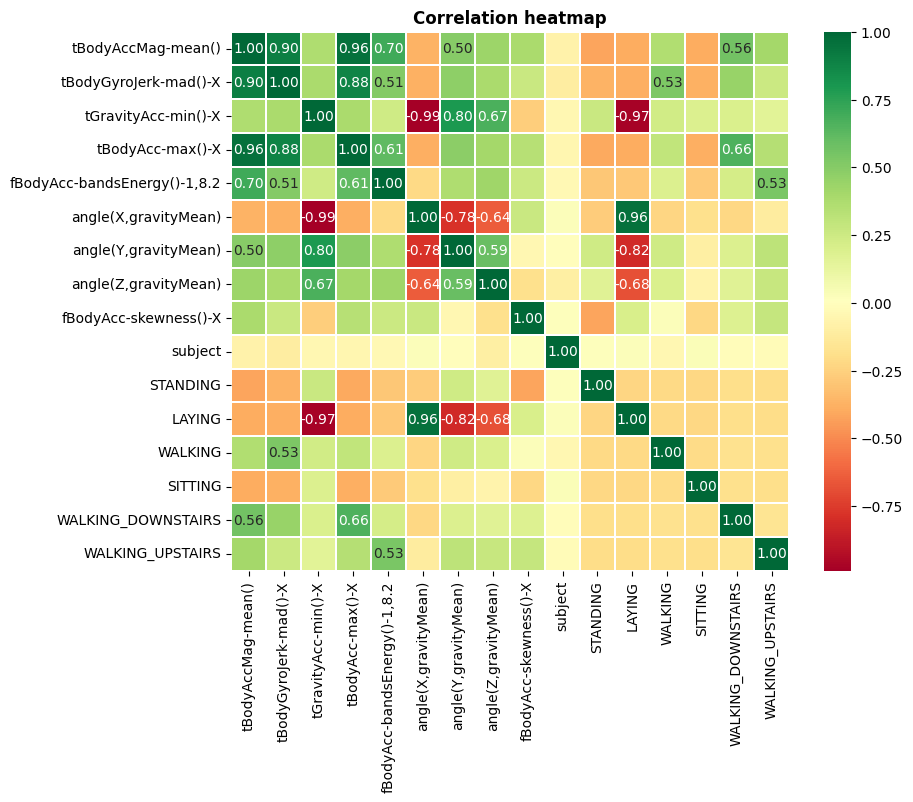

In [ ]:
import math
cors_train = train
dat = ["STANDING", "LAYING", "WALKING", "SITTING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
for t in dat:
  cors_train[str(t)] = 0
  cors_train.loc[cors_train["Activity"] == str(t), str(t)] = 1

fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.heatmap(cors_train.corr(), cmap ="RdYlGn" , annot = True, fmt = "0.2f", linewidth = .3)
#plt.figure(figsize = (12, 8))
plt.title('Correlation heatmap', fontweight = "bold")
for t in ax.texts:
  if float(t.get_text())>=0.5 or float(t.get_text())<=-0.5:
    t.set_text(t.get_text())
  else:
    t.set_text("")


Визуализируем вообще весь train с помощью пэйрплота и выведем все графики разбросы

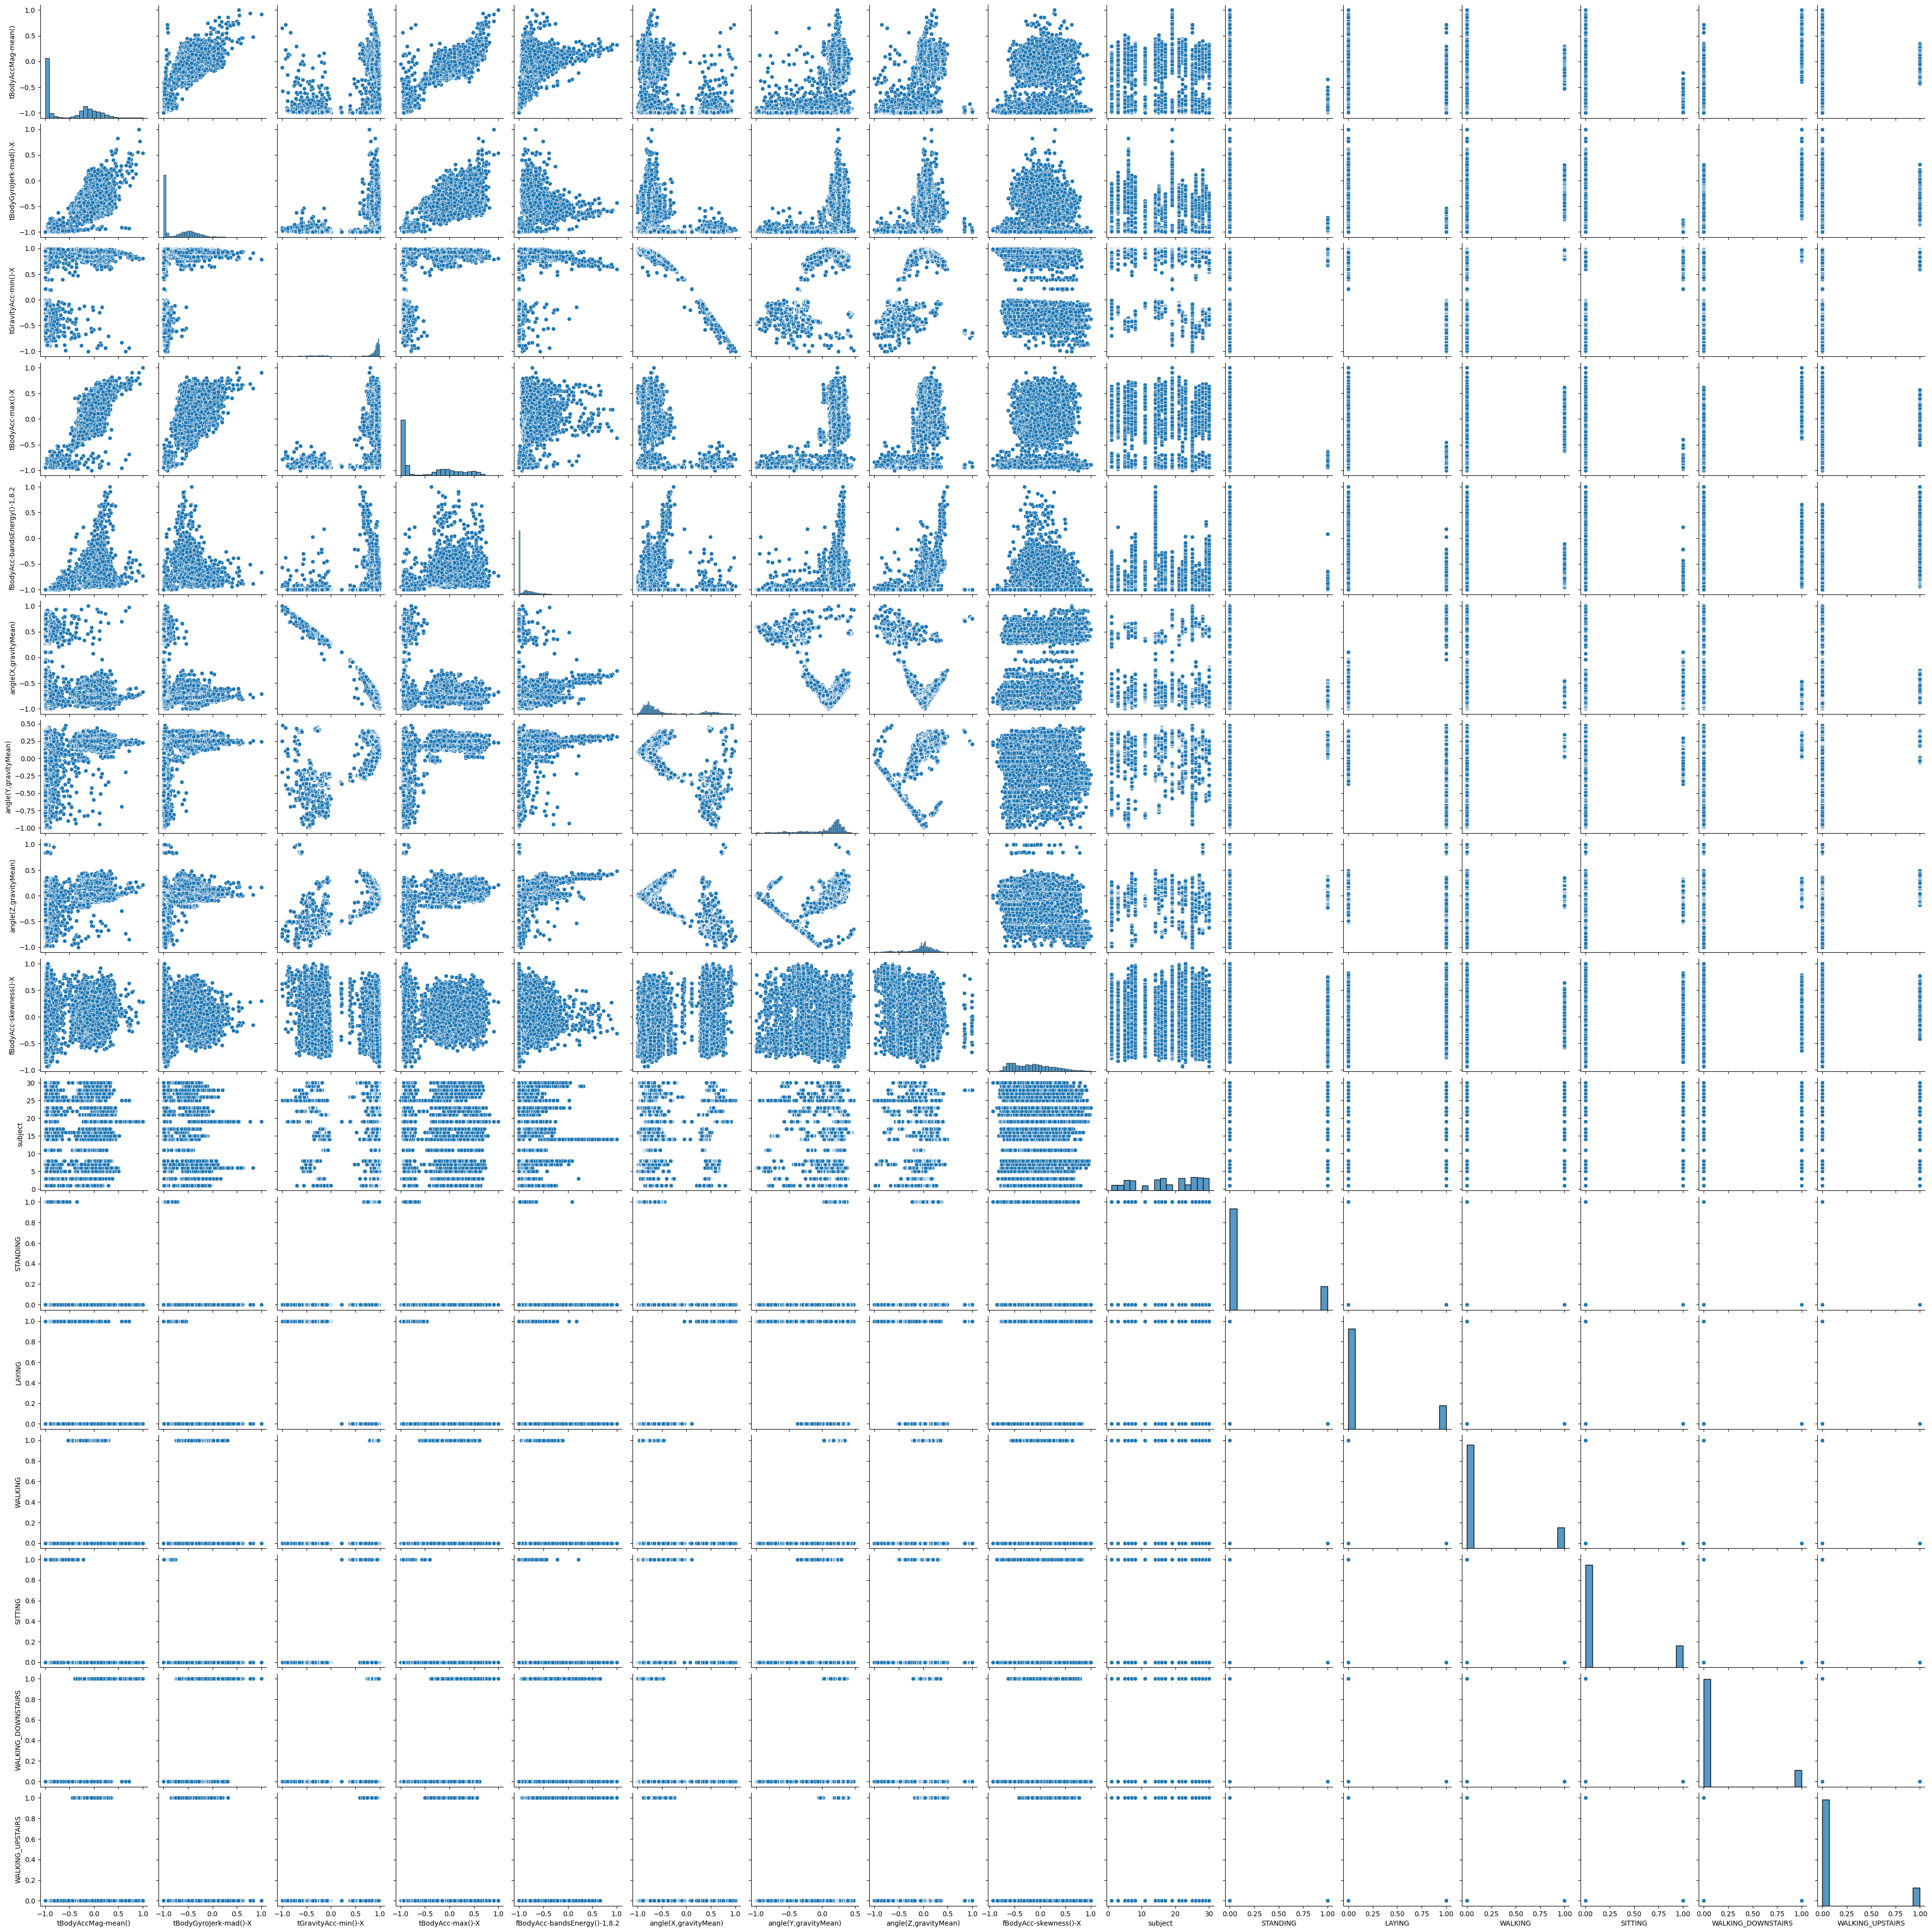

In [ ]:
sns.pairplot(train)

особо ничего это нам не дает, так как ничего не понятно и не особо видно, но для галочки - сделали. Теперь давайте попробуем отобразить плотность распределения tBodyAccMag-mean()  для каждой из активностей и попробуем разделить линией две группы (активных и неактивных)

Text(0.5, 1.0, 'Mean body acceleration for activities')

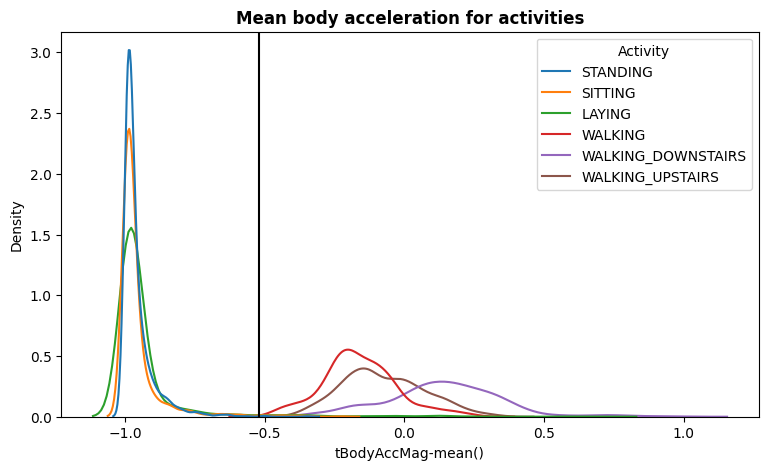

In [ ]:
fig, ax = plt.subplots(figsize =(9, 5))
sns.kdeplot(train, x='tBodyAccMag-mean()', hue='Activity')
plt.axvline(x = -0.52, color = "black")
plt.title("Mean body acceleration for activities", fontweight = "bold")

Как видим - наша гипотеза про ускорение и вид деятельности подтвердилась графиком.

Попробуем порисовать ящики с усами по фиче с названием angle(x,gravityMean) c разделением на разные виды активности.

Text(0.5, 1.0, 'Angle between X-axis and gravitational acceleration')

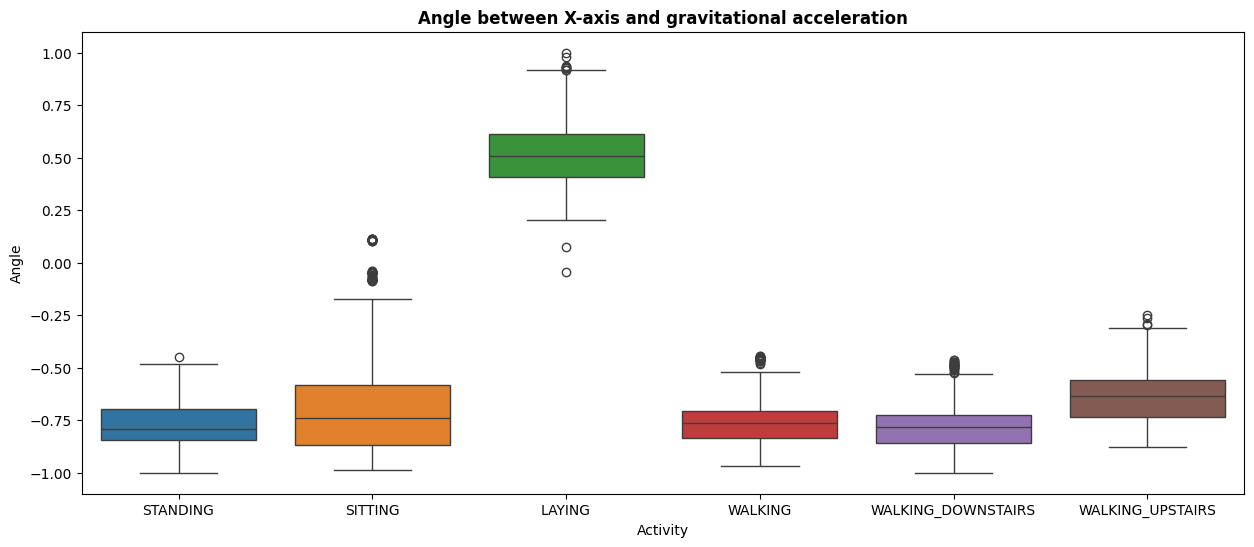

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.boxplot(train, y = "angle(X,gravityMean)", x = "Activity", hue = "Activity")
plt.ylabel("Angle")
plt.title("Angle between X-axis and gravitational acceleration", fontweight = "bold")

Круто! Можем сделать еще один вывод о том, что когда мы лежим - угол между осью X и усредненной графитационной составляющей равен положительному значению - это круто и логично.

Отлично! Я показал свои способности в выдвижении гипотез, рисовании графиков , предобработке данных - теперь перейдем непосредственно к задачам машинного обучения.

Задание №2. Выберите целевую переменную и решите задачу регрессии, рассмотрев минимум 5 моделей и определив минимум 3 метрики работы моделей. Выберите лучшую модель. Для лучшей модели определите значимость признаков. Отбросив половину худших признаков, определите метрики работы модели без этих признаков. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях. Оцените качество работы лучшей моделей на основе кросс-валидации. Постройте кривые обучения (потерь) и оцените недообучение и переобучение.

Рассмотрим 5 моделей:DecisionTreeRegressor,MLPRegressor, SVR, RandomForestRegressor,LinearRegression. B возьмем 3-4 метрики ,такие как на примере mae,mse,r2. За целевую переменную возьмем например tBodyAcc-max()-X

In [ ]:
y_train = train["tBodyAcc-max()-X"]
y_test = test["tBodyAcc-max()-X"]

In [ ]:
X_train = train[["tBodyAccMag-mean()","tBodyGyroJerk-mad()-X","tGravityAcc-min()-X","fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","fBodyAcc-skewness()-X"]]
X_test = test[["tBodyAccMag-mean()","tBodyGyroJerk-mad()-X","tGravityAcc-min()-X","fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","fBodyAcc-skewness()-X"]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}\n")

Metrics for Linear Regression:
Mean Squared Error: 0.01880522857894746
Mean Absolute Error: 0.08991588550570391
R-squared: 0.9314665647520397

Metrics for Random Forest:
Mean Squared Error: 0.018524369269894717
Mean Absolute Error: 0.08085463203919903
R-squared: 0.932490123343202

Metrics for Support Vector Machine:
Mean Squared Error: 0.016543034003709982
Mean Absolute Error: 0.0907217802175504
R-squared: 0.9397108657872256

Metrics for Neural Network:
Mean Squared Error: 0.015428155178408362
Mean Absolute Error: 0.07662513287241064
R-squared: 0.9437739100337958

Metrics for Decision Tree:
Mean Squared Error: 0.04206732567112615
Mean Absolute Error: 0.1167520211712148
R-squared: 0.8466905984240716



Лучшей моделью стала нейронка

In [ ]:
model = MLPRegressor()
model.fit(X_train, y_train)

MLPRegressor()

In [ ]:
print("Weights of the coefficients for MLPRegressor:")
for i, coef in enumerate(model.coefs_):
    print(f"Layer {i} weights shape: {coef.shape}")
    print(coef)

Weights of the coefficients for MLPRegressor:
Layer 0 weights shape: (8, 100)
[[ 1.95351408e-01  2.69804643e-02 -2.48136103e-14 -2.01419517e-01
  -1.08211928e-01 -1.36953382e-01  3.34078281e-01  7.52035062e-02
  -2.37241463e-02 -8.26752194e-02  1.51132761e-01  1.13677296e-01
   1.03725524e-01  2.89674438e-01  4.26583848e-01 -1.14559593e-01
  -6.61586543e-02  2.19097457e-01  1.57757326e-01  8.01908644e-02
  -1.06001946e-01  8.28741327e-02  4.02514938e-02  1.07755892e-01
   1.86464207e-02 -2.04790538e-01  2.35169356e-01 -1.93385770e-01
  -9.26135951e-02  6.03507427e-01  9.80558940e-02  1.31612436e-01
  -1.60803409e-02 -3.23521593e-02 -2.17907950e-01  3.13933403e-01
   5.09578330e-01  2.54644271e-02 -2.41778781e-01  3.14530310e-02
   4.37377576e-01 -2.25630452e-01 -7.48220988e-02  1.17550120e-01
  -7.55380242e-02  3.53160278e-01  1.70728323e-07  1.84097286e-01
  -7.94225765e-02 -1.98305676e-01 -2.67973988e-01 -4.29942078e-03
   6.24708914e-02 -7.71236660e-02  1.44183204e-01 -9.08377606e-0

К сожалению мы не можем вывести веса каждой фичи если это нейронка, так как нейронка стала нашей лучшей моделью машинного обучения, поэтому выше я вывел просто веса коэфов для каждого слоя нейронной сети.

Далее построим кривую обучения и оценим перееобучение.

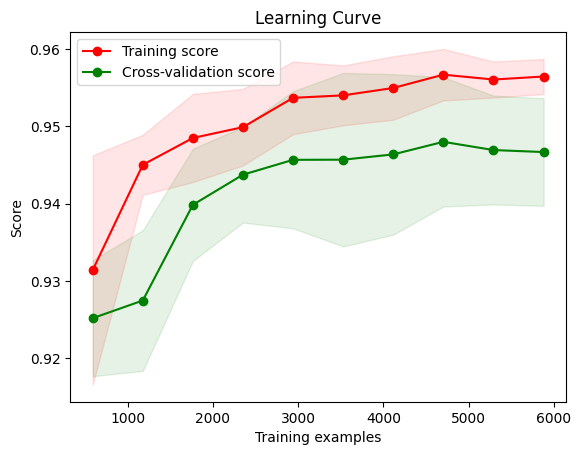

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score

# Предположим, что у вас уже есть обученная модель MLPRegressor с именем model
model = MLPRegressor()

# Оценка обучения и переобучения с помощью кросс-валидации
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Вычисление средних значений и стандартных отклонений для обучающих и тестовых оценок
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение кривой обучения
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Как видим - модель обучена хорошо

Задание 3. Выберите целевую переменную и решите задачу классификации, рассмотрев минимум 5 моделей и определив 4 метрики работы моделей. Выберите лучшую модель. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train = train[["tBodyAcc-max()-X","tBodyAccMag-mean()","tBodyGyroJerk-mad()-X","tGravityAcc-min()-X","fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","fBodyAcc-skewness()-X"]]
X_test = test[["tBodyAcc-max()-X","tBodyAccMag-mean()","tBodyGyroJerk-mad()-X","tGravityAcc-min()-X","fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","fBodyAcc-skewness()-X"]]

In [ ]:
y_train = train["Activity"]
y_test = test["Activity"]

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Модель: {model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Модель: Decision Tree - Accuracy: 0.7560230743128605, Precision: 0.7595474735966729, Recall: 0.7560230743128605, F1 Score: 0.755484101737828
Модель: Random Forest - Accuracy: 0.7967424499491008, Precision: 0.8016304324235994, Recall: 0.7967424499491008, F1 Score: 0.7970071776985554
Модель: Logistic Regression - Accuracy: 0.837122497455039, Precision: 0.8391760035078879, Recall: 0.837122497455039, F1 Score: 0.8363593944578842
Модель: SVM - Accuracy: 0.846284356973193, Precision: 0.8489661767058383, Recall: 0.846284356973193, F1 Score: 0.8458173304484603
Модель: KNN - Accuracy: 0.832711231761113, Precision: 0.836370556401396, Recall: 0.832711231761113, F1 Score: 0.8327381652501196


Как видим - лучшая модель SVM , подберем оптимальные параметры с помощью GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение набора параметров, которые вы хотите оптимизировать
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Создание модели SVM
svm = SVC()

# Создание объекта GridSearchCV для настройки параметров с помощью перекрестной проверки
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Подгонка модели к данным
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
model = SVC(C = 100, gamma = 0.1, kernel = 'rbf')
model.fit(X_train, y_train)
print(f"Модель: {model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Модель: KNN - Accuracy: 0.832711231761113, Precision: 0.836370556401396, Recall: 0.832711231761113, F1 Score: 0.8327381652501196


Как видим - стоковые гиперпараметры - самые лучшие.

Задание 4. Решите задачу уменьшения размерности (неконтролируемое обучение). Используя модели из п.2 или п.3, оцените как уменьшение размерности повлияло на метрики работы модели.

Теперь решим задачу уменьшения размерности, хотя я бы этого не делал, но для того чтобы показать что я это умею - сделаю.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
pca = PCA(n_components=6)  # Оставим тут 6 компонент

# Создание объекта StandardScaler (стандартизация)
scaler = StandardScaler()

# Создание модели SVC c подобранными параметрами
svc = SVC(C=100, gamma=0.1, kernel='rbf')

# Создание конвейера, который включает стандартизацию, уменьшение размерности и классификацию
model = make_pipeline(scaler, pca, svc)

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6)), ('svc', SVC(C=100, gamma=0.1))])

In [ ]:
y_pred = model.predict(X_test)

# Вычисление метрик качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Вывод метрик
print(f"Метрики качества:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Метрики качества:
Accuracy: 0.7678995588734306
Precision: 0.7724329317457954
Recall: 0.7678995588734306
F1 Score: 0.767617066847966


Как видим , из за того что мы лишились некоторых фиче, метрики упали - это нормально и этого стоило ожидать. Для пункта 2 будет аналогичная картина, так как , когда фичей всего 8-9 при уменьшения размерности до 6 этого стоит ожидать.

Задание 5. Решите задачу кластеризации, используя минимум 3 модели. Определите метрики кластеризации.

In [ ]:
X_activity = X_train

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Предположим, что у вас есть матрица признаков X_activity для переменной Activity

# Стандартизация данных
scaler = StandardScaler()
X_activity_scaled = scaler.fit_transform(X_activity)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_activity_scaled)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_activity_scaled)

# Кластеризация с помощью Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6)
agg_labels = agg_clustering.fit_predict(X_activity_scaled)

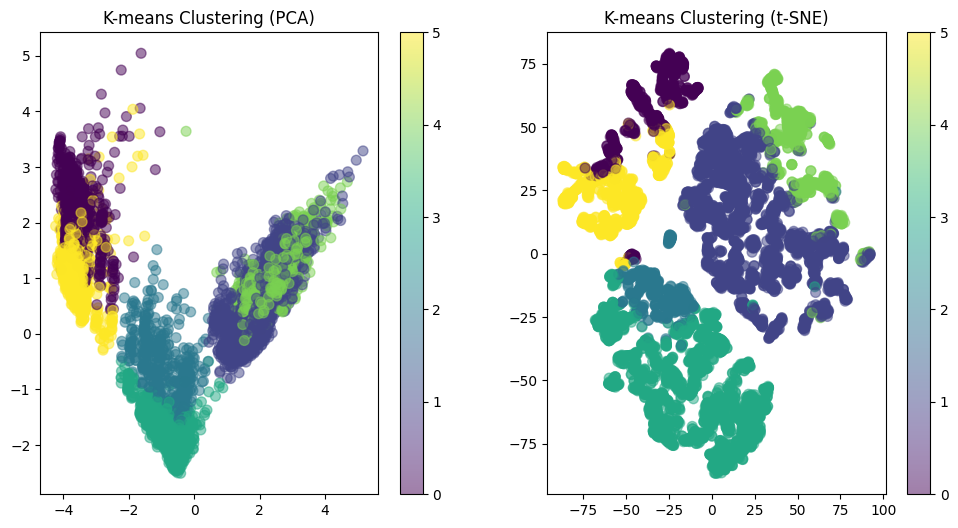

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Предположим, что у вас уже есть метки кластеров kmeans_labels, dbscan_labels и agg_labels

# Применение метода PCA для понижения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_activity_scaled)

# Применение метода t-SNE для понижения размерности до 2D
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_activity_scaled)

# Визуализация кластеризации для K-means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering (PCA)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering (t-SNE)')
plt.colorbar()
plt.show()

Как то вот так ,выведем метрики...

In [ ]:
from sklearn import metrics

# Для K-means
silhouette_kmeans = metrics.silhouette_score(X_activity_scaled, kmeans_labels)
calinski_harabasz_kmeans = metrics.calinski_harabasz_score(X_activity_scaled, kmeans_labels)
davies_bouldin_kmeans = metrics.davies_bouldin_score(X_activity_scaled, kmeans_labels)

# Для DBSCAN
silhouette_dbscan = metrics.silhouette_score(X_activity_scaled, dbscan_labels)
calinski_harabasz_dbscan = metrics.calinski_harabasz_score(X_activity_scaled, dbscan_labels)
davies_bouldin_dbscan = metrics.davies_bouldin_score(X_activity_scaled, dbscan_labels)

# Для Agglomerative Clustering
silhouette_agg = metrics.silhouette_score(X_activity_scaled, agg_labels)
calinski_harabasz_agg = metrics.calinski_harabasz_score(X_activity_scaled, agg_labels)
davies_bouldin_agg = metrics.davies_bouldin_score(X_activity_scaled, agg_labels)

# Вывод метрик
print("Silhouette Score:")
print(f"K-means: {silhouette_kmeans}, DBSCAN: {silhouette_dbscan}, Agglomerative Clustering: {silhouette_agg}")
print("\nCalinski Harabasz Score:")
print(f"K-means: {calinski_harabasz_kmeans}, DBSCAN: {calinski_harabasz_dbscan}, Agglomerative Clustering: {calinski_harabasz_agg}")
print("\nDavies Bouldin Score:")
print(f"K-means: {davies_bouldin_kmeans}, DBSCAN: {davies_bouldin_dbscan}, Agglomerative Clustering: {davies_bouldin_agg}")

Silhouette Score:
K-means: 0.4001276049335574, DBSCAN: 0.09950739854079525, Agglomerative Clustering: 0.3806965605480144

Calinski Harabasz Score:
K-means: 5881.281788302316, DBSCAN: 52.34594149746244, Agglomerative Clustering: 5490.4689927150175

Davies Bouldin Score:
K-means: 1.200587516028374, DBSCAN: 1.2546086948008657, Agglomerative Clustering: 1.2489069595912257


## ИТОГ

В качестве потенциального внедрения в мой проект, я могу предложить внедрить данное проектное задание в приложение по составлению туристических маршрутов. Мы можем предсказывать на основе этих моделей сложность маршрута по ускорению человека или количеству зафиксированных активностей. Также мы можем предсказывать это и для разных групп людей, имеющих разный уровень подготовки. В приложении будет внедрён критерий эксперной оценки маршрута.

In [ ]:
п
п
п
п
п
п
п
п
п

п
п
п
п
пп

пп
п
п
п
п
п
п
п
п
п
п
п
п
п
п
п
пп
п
п
п
п

п
п
п
п
п
п
п
пп
а
пвв
ап
вап
ва
пы